In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img


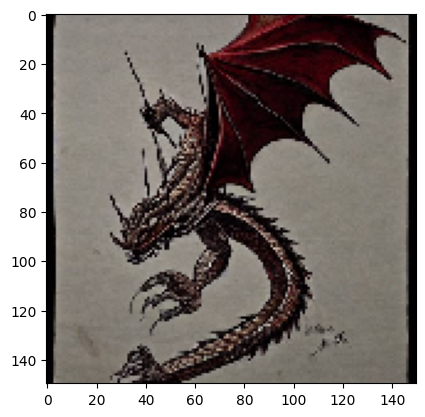

In [2]:
image_example = 'train/dragon/000bf8e2-6467-462f-b4c8-61c78f94241b.jpg'

img = load_img(image_example, target_size=(150,150,3))

plt.imshow(img);

## Model

In [68]:
inputs = keras.Input(shape = (150,150,3))
x = keras.layers.Conv2D(32, (3,3), activation = 'relu')(inputs)
x = keras.layers.MaxPooling2D((2,2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation = 'relu')(x)
outputs = keras.layers.Dense(1, activation = 'sigmoid')(x)

In [69]:
model = keras.Model(inputs = inputs, outputs = outputs)
lr= 0.002
momentum= 0.9
optimizer = keras.optimizers.SGD(learning_rate=lr, momentum=momentum)
#Q1: Since we have a binary classification problem, the best loss function is binary_crossentropy
model.compile(optimizer = keras.optimizers.SGD(lr=lr, momentum=momentum), loss = 'binary_crossentropy', metrics = ['accuracy'])



c:\Users\User\anaconda3\envs\mlbookcamp\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [70]:
#Total number of parameters of the model 
model.summary()

## Q2:11215873

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                           

In [89]:
##Generators and Training
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary',
    shuffle = True,
)

validation_generator = test_datagen.flow_from_directory(
    'test',
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary',
    shuffle = True,
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [92]:
##Class indices
train_generator.class_indices

{'dino': 0, 'dragon': 1}

In [72]:
##Training 
history = model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator
)

Epoch 1/10
80/80 [==============================] - 11s 137ms/step - loss: 0.6938 - accuracy: 0.5207 - val_loss: 0.6894 - val_accuracy: 0.5381
Epoch 2/10
80/80 [==============================] - 11s 132ms/step - loss: 0.6451 - accuracy: 0.6424 - val_loss: 0.6791 - val_accuracy: 0.5305
Epoch 3/10
80/80 [==============================] - 11s 140ms/step - loss: 0.4920 - accuracy: 0.7622 - val_loss: 0.3970 - val_accuracy: 0.8350
Epoch 4/10
80/80 [==============================] - 11s 137ms/step - loss: 0.3770 - accuracy: 0.8438 - val_loss: 0.3268 - val_accuracy: 0.8604
Epoch 5/10
80/80 [==============================] - 12s 147ms/step - loss: 0.3219 - accuracy: 0.8695 - val_loss: 0.3003 - val_accuracy: 0.8706
Epoch 6/10
80/80 [==============================] - 13s 162ms/step - loss: 0.2774 - accuracy: 0.8971 - val_loss: 0.2939 - val_accuracy: 0.8832
Epoch 7/10
80/80 [==============================] - 12s 143ms/step - loss: 0.2397 - accuracy: 0.9084 - val_loss: 0.2958 - val_accuracy: 0.8807

Q3: 0.8833124041557312


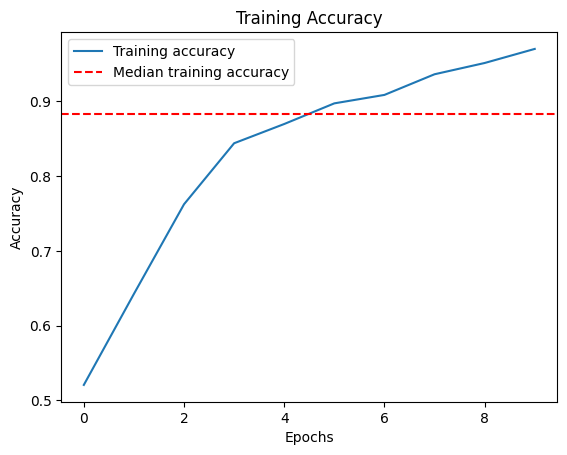

In [73]:
#Median of training accuracy for all the epochs

print('Q3:', np.median(history.history['accuracy']))

plt.plot(history.history['accuracy'], label = 'Training accuracy');
plt.axhline(y = np.median(history.history['accuracy']), color = 'red', linestyle = '--', label = 'Median training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy');


Q4: 0.19304833112011702


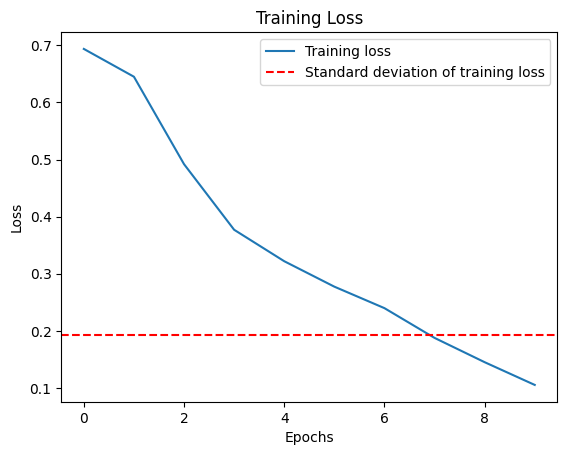

In [74]:
#Standard desviation of training loss
print('Q4:', np.std(history.history['loss']))

plt.plot(history.history['loss'], label = 'Training loss')
plt.axhline(y = np.std(history.history['loss']), color = 'red', linestyle = '--', label = 'Standard deviation of training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss');

## Data Augmentation

In [75]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [76]:
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size = (150,150),
    batch_size = 20,
    shuffle = True,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    'test',
    target_size = (150,150),
    batch_size = 20,
    shuffle = True,
    class_mode = 'binary'
)


Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


Let's train our model for 10 more epochs using the same code as previously. Make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

In [77]:
history = model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator
)


Epoch 1/10
80/80 [==============================] - 16s 203ms/step - loss: 0.4831 - accuracy: 0.7647 - val_loss: 0.3153 - val_accuracy: 0.8807
Epoch 2/10
80/80 [==============================] - 17s 218ms/step - loss: 0.4611 - accuracy: 0.7892 - val_loss: 0.5979 - val_accuracy: 0.7335
Epoch 3/10
80/80 [==============================] - 18s 226ms/step - loss: 0.4615 - accuracy: 0.7923 - val_loss: 0.3279 - val_accuracy: 0.8655
Epoch 4/10
80/80 [==============================] - 17s 213ms/step - loss: 0.3888 - accuracy: 0.8394 - val_loss: 0.6674 - val_accuracy: 0.7284
Epoch 5/10
80/80 [==============================] - 17s 214ms/step - loss: 0.3828 - accuracy: 0.8325 - val_loss: 0.3639 - val_accuracy: 0.8503
Epoch 6/10
80/80 [==============================] - 17s 212ms/step - loss: 0.3578 - accuracy: 0.8526 - val_loss: 0.4643 - val_accuracy: 0.7995
Epoch 7/10
80/80 [==============================] - 19s 242ms/step - loss: 0.3690 - accuracy: 0.8381 - val_loss: 0.3222 - val_accuracy: 0.8477

Q5: 0.45871712565422057


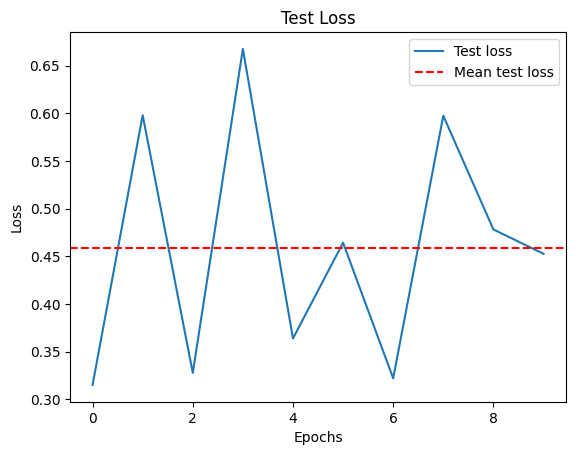

In [78]:
##Mean of test loss 
print('Q5:', np.mean(history.history['val_loss']))

plt.plot(history.history['val_loss'], label = 'Test loss')
plt.axhline(y = np.mean(history.history['val_loss']), color = 'red', linestyle = '--', label = 'Mean test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Test Loss');


What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

Q6: 0.8043147206306458


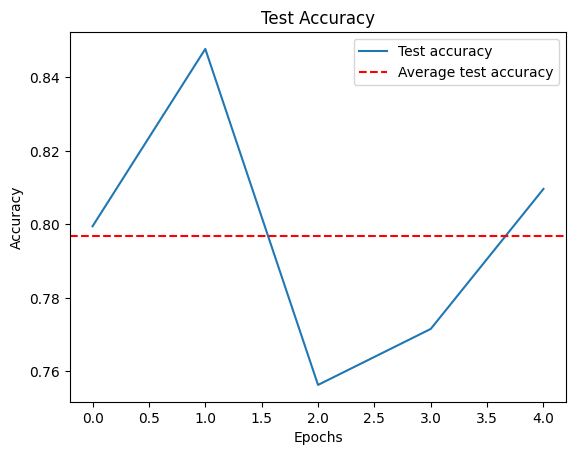

In [79]:
# Average 
np.average(history.history['val_accuracy'][-5:])

print('Q6:', np.average(history.history['val_accuracy']))

plt.plot(history.history['val_accuracy'][-5:], label = 'Test accuracy')
plt.axhline(y = np.average(history.history['val_accuracy'][-5:]), color = 'red', linestyle = '--', label = 'Average test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Test Accuracy');


In [ ]:
## Save the model
model.save('dino_dragon_classifier.h5')

In [80]:
## Testing model
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
dragon_blanco = load_img('./dragon_blanco.png', target_size=(150,150,3))


In [95]:
##Using model
from tensorflow.keras.models import load_model
model = load_model('dino_dragon_classifier.h5')
## Predictions, white dragon
if model.predict(np.expand_dims(dragon_blanco, axis = 0)) ==1.0:
    print('Q7: Dragon')
else:
    print('Q7: Dinosaur')


1/1 [==============================] - 0s 54ms/step
Q7: Dragon
